In [1]:
import numpy as np
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

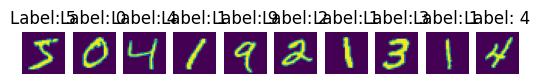

In [4]:
import matplotlib.pyplot as plt

# Display a few sample images from the MNIST dataset
num_samples = 10
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    #other than this 'viridis', we have 'jet','hot,'cool','spring,'summer','autumn','gray'
    plt.imshow(x_train[i], cmap='viridis')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


In [5]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [7]:
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [8]:
model.compile(optimizer='Adam',               # Optimizer: Adam
              loss='sparse_categorical_crossentropy', # Loss function: Sparse categorical crossentropy
              metrics=['accuracy']) 

In [9]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2655 - accuracy: 0.9344 - val_loss: 0.0787 - val_accuracy: 0.9743
Epoch 2/30
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0711 - accuracy: 0.9778 - val_loss: 0.0661 - val_accuracy: 0.9787
Epoch 3/30
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0559 - accuracy: 0.9828 - val_loss: 0.0668 - val_accuracy: 0.9776
Epoch 4/30
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0535 - val_accuracy: 0.9829
Epoch 5/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0414 - accuracy: 0.9880 - val_loss: 0.0515 - val_accuracy: 0.9856
Epoch 6/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.0564 - val_accuracy: 0.9827
Epoch 7/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0549 -

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.1002 - accuracy: 0.9884
Test Loss: 0.10017459839582443
Test Accuracy: 0.9883999824523926


In [11]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


1/1 [==============================] - 0s 109ms/step
This digit is probably a 3


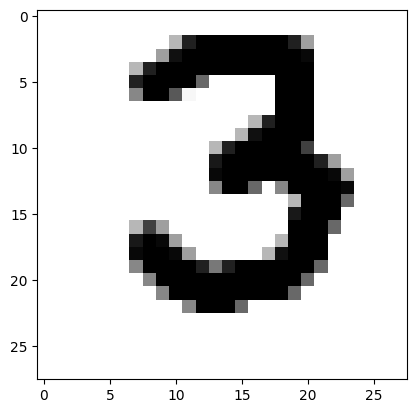

1/1 [==============================] - 0s 21ms/step
This digit is probably a 8


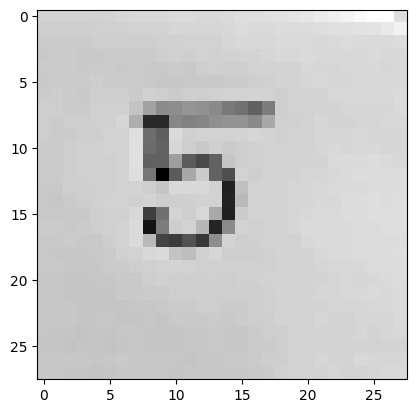

1/1 [==============================] - 0s 18ms/step
This digit is probably a 8


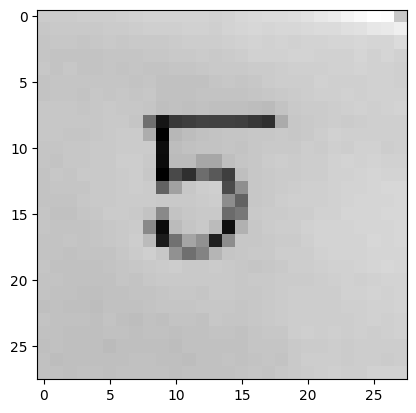

In [12]:
model=tf.keras.models.load_model('handwritten.model')
import os
import cv2
image_number=1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
       img=cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
       img=np.invert(np.array([img]))   
       prediction=model.predict(img)
       print(f"This digit is probably a {np.argmax(prediction)}") 
       plt.imshow(img[0],cmap=plt.cm.binary)
       plt.show()
       image_number+=1   
    except:
        print("Error!")  
    finally:
        image_number+=1         

In [13]:
import tensorflow as tf
import numpy as np
import cv2

# Load the trained model
model = tf.keras.models.load_model("handwritten.model")

# Function to preprocess the image
def preprocess_image(image):
    # Resize the image to 28x28 pixels
    image = cv2.resize(image, (28, 28))
    # Convert the image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Normalize the image
    image = image / 255.0
    # Reshape the image to match the input shape of the model
    image = image.reshape(1, 28, 28, 1)
    return image

# Function to predict digit from image
def predict_digit_from_image(image):
    # Preprocess the image
    processed_image = preprocess_image(image)
    # Make prediction
    prediction = model.predict(processed_image)
    predicted_digit = np.argmax(prediction)
    return predicted_digit
